In [1]:
import emcee
from scipy.optimize import minimize
import corner
import ptemcee
import subprocess
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import run_simple_energy_loss

In [3]:
simulation=run_simple_energy_loss.run_simulation

In [4]:
pT_range = (1, 10, 10) # Compute more observable than needed to avoid boundry unstabilities.
pT_obs = [3, 5, 7] # p_T Observables we will use for the analysis

In [5]:
from emukit.core import ParameterSpace, ContinuousParameter

In [6]:
prior_ranges= {'alpha_s':(0.05,0.5), 'exponent_inel':(-3,3), 'exponent_el':(-3,3), 'scale_inel':(0.1, 0.5), 'scale_el':(0.1, 0.5)}
true_values= {'alpha_s': 0.2, 'exponent_inel': -1, 'exponent_el': 1, 'scale_inel': 0.3, 'scale_el': 0.3}
name_to_position =  {'alpha_s':0, 'exponent_inel':1, 'exponent_el':2, 'scale_inel':3, 'scale_el':4}

In [7]:
# We will generate observable for these model parametr values and consider them as experimental data
# We will generate observables for these model parameter values and consider them as experimental data
truth = np.array([true_values['alpha_s'],  true_values['exponent_inel'],
                 true_values['exponent_el'],true_values['scale_inel'],true_values['scale_el']]).reshape(1,-1)

Working on 1/1 design


/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning: dopri5: step size becomes too small
  self.messages.get(istate, unexpected_istate_msg)))
/Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning: dopri5: larger nsteps is needed
  self.messages.get(istate, unexpected_istate_msg)))
/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res_quad2b=scipy.integrate.quad(lambda u, p=p: p*integrand_middle(p,u), 0, delta, limit=npts, epsabs=epsabs, epsrel=epsrel)
/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:73: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  res_quad2a=scipy.integrate.quad(vec_integrand, pmin, p, limit=npts, epsabs=epsabs, epsrel=epsrel)


Text(0.5, 1.0, 'Experimental observations')

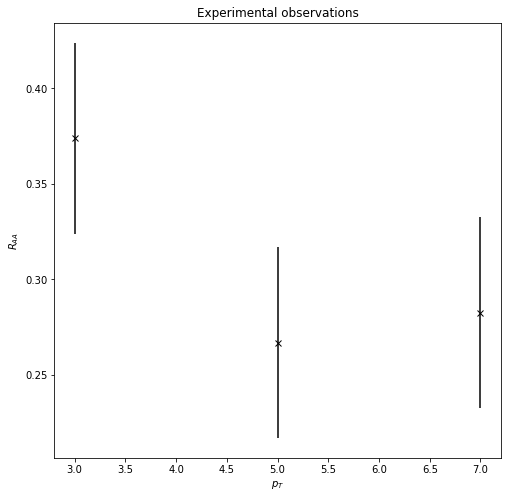

In [8]:
# Set seed for reproducibility.
seed = 42
np.random.seed(seed)

# Generate some synthetic data from the model.
x = np.array(pT_obs)
N = len(x)
obserr = 0.05 # Amplitude of noise term
obs = simulation(truth, *pT_range)[:,pT_obs] # True model
obs += obserr * np.random.randn(N) # Add some random noise

# Now plot it to see what the data looks like
fig, ax = plt.subplots(figsize=(8,8))

ax.errorbar(x.flatten(), obs.flatten(), yerr=obserr, fmt="xk", capsize=0)
#ax.plot(x.flatten(), obs.flatten(), "k", alpha=0.3, lw=3)
#ax.set_xlim(0, 10)
ax.set_xlabel(r"$p_T$")
ax.set_ylabel(r"$R_{AA}$")
ax.set_title('Experimental observations')

In [9]:
parameter_space = ParameterSpace([ContinuousParameter('alpha_s', 0.05,0.5 ),
                                  ContinuousParameter('exponent_inel', -3, 3),
                                  ContinuousParameter('exponent_el', -3, 3),
                                  ContinuousParameter('scale_inel', 0.1, 0.5),
                                  ContinuousParameter('scale_el', 0.1, 0.5)])

In [10]:
from emukit.core.initial_designs import RandomDesign

design = RandomDesign(parameter_space)
num_data_points = 5
X = design.get_samples(num_data_points)
print(f'Shape of X {X.shape}')

Shape of X (5, 5)


In [11]:
def f(design, pT=pT_obs[0]):
    """returns simulation output for a design matrix"""
    print(design)
    observables=simulation(design,*pT_range)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,pT]

def f1(design, pT=pT_obs[0]):
    """returns simulation output for a design matrix"""
    print(design)
    observables=simulation(design,*pT_range)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,pT].reshape(-1,1)

def f2(design, pT=pT_obs[1]):
    """returns simulation output for a design matrix"""
    print(design)
    observables=simulation(design,*pT_range)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,pT].reshape(-1,1)

def f3(design, pT=pT_obs[2]):
    """returns simulation output for a design matrix"""
    print(design)
    observables=simulation(design,*pT_range)
    #Let's just return only one obsrvable for now. The middle p_T bin
    return observables[:,pT].reshape(-1,1)

fun=np.array([f1, f2, f3])

In [12]:
#Generate 5 randome observables
Y = f(X,pT_obs)

[[ 0.12020839  1.24843547 -1.9090502   0.21649166  0.28242799]
 [ 0.12019753 -2.87649303 -1.89957294  0.34474116  0.41407038]
 [ 0.07613763  2.81945911 -1.17454654  0.15579754  0.17986951]
 [ 0.43977927  1.99465584  0.14853859  0.21685786  0.30569378]
 [ 0.32050176 -1.72596534 -0.40832989  0.24654474  0.33696583]]
Working on 1/5 design
Working on 2/5 design
Working on 3/5 design
Working on 4/5 design
Working on 5/5 design


/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning: invalid value encountered in log
  log_P_g_prev=np.log(P_g)
/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  res_quad2c=scipy.integrate.quad(vec_integrand, p, pmax, limit=npts, epsabs=epsabs, epsrel=epsrel)
/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:79: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  res_quad2c=scipy.integrate.quad(vec_integrand, p*(1+delta), pmax, limit=npts, epsabs=epsabs, epsrel=epsrel)
/Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning: The occurrence of roundoff error is detected, which pr

In [13]:
from GPy.kern import RBF, White
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper
from multiprocessing import Pool

### Let's build a emulator for each observable (3 in total) and query 5 points for each emulator at a time. Then train all 3 emulators on these new 5 points that we get in each iteration. 

In [14]:
# size of possible variation of parameters
ptp = np.array([prior_ranges['alpha_s'][1],prior_ranges['exponent_inel'][1],prior_ranges['exponent_el'][1],prior_ranges['scale_inel'][1],prior_ranges['scale_el'][1]])\
-np.array([prior_ranges['alpha_s'][0],prior_ranges['exponent_inel'][0],prior_ranges['exponent_el'][0],prior_ranges['scale_inel'][0],prior_ranges['scale_el'][0]])

gp_array = []
for i,pt in enumerate(pT_obs):
    rbf_kern =      RBF(  input_dim=5,
                          variance= 1,
                          lengthscale=ptp,
                          ARD=True)
    my_kernel = rbf_kern
    model_gpy = GPRegression(X=X,Y=Y[:, i].reshape(-1,1),kernel=my_kernel, noise_var=0.01**2)
    model_gpy.optimize_restarts(num_restarts = 30)
    model_emukit = GPyModelWrapper(model_gpy, n_restarts=30)
    gp_array.append(model_emukit)

Optimization restart 1/30, f = -0.517570421816393
Optimization restart 2/30, f = -0.5175747604149712
Optimization restart 3/30, f = -0.5175746063830977
Optimization restart 4/30, f = 0.2116361865511216
Optimization restart 5/30, f = 3.7854579870774465
Optimization restart 6/30, f = -0.5175580628978849
Optimization restart 7/30, f = -0.5175747161419957
Optimization restart 8/30, f = -0.5175747258556558
Optimization restart 9/30, f = -0.5175646946937569
Optimization restart 10/30, f = -0.517572795787645
Optimization restart 11/30, f = -0.5175746838216861
Optimization restart 12/30, f = 3.785458013298841
Optimization restart 13/30, f = 3.785457200859773
Optimization restart 14/30, f = -0.5175747586068393
Optimization restart 15/30, f = 0.2439208648515816
Optimization restart 16/30, f = -0.5175747629383332
Optimization restart 17/30, f = -0.5175747704436229
Optimization restart 18/30, f = 0.09529531154006454
Optimization restart 19/30, f = 0.24392091118951997
Optimization restart 20/30, f 

 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in true_divide
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply


Optimization restart 14/30, f = -0.4661199749129157
Optimization restart 15/30, f = -0.46606990856893526
Optimization restart 16/30, f = -0.46612012872900976
Optimization restart 17/30, f = -0.46612011138415
Optimization restart 18/30, f = 3.497640463387766
Optimization restart 19/30, f = -0.46611456220678793
Optimization restart 20/30, f = -0.4660823637671605
Optimization restart 21/30, f = -0.46611420459025865
Optimization restart 22/30, f = -0.1406160134376755
Optimization restart 23/30, f = -0.466120060058703
Optimization restart 24/30, f = -0.14061600124747287
Optimization restart 25/30, f = 3.4977667205524856
Optimization restart 26/30, f = -0.46612012289817395
Optimization restart 27/30, f = -0.4661198683205421
Optimization restart 28/30, f = -0.14061612819193137
Optimization restart 29/30, f = -0.46611819765024487
Optimization restart 30/30, f = 3.4977680675267644
Optimization restart 1/30, f = -0.44678043874928175
Optimization restart 2/30, f = -0.44677899706758817
Optimizatio

In [15]:
from emukit.experimental_design.acquisitions import IntegratedVarianceReduction, ModelVariance
from emukit.experimental_design import ExperimentalDesignLoop

In [16]:
integrated_var = []
for g in gp_array:
    print(g.model)
    integrated_var.append(IntegratedVarianceReduction(model = g, space=parameter_space))


Name : GP regression
Objective : -0.5175747704436229
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |     0.26437635834107004  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  5.562684646268137e-309  |      +ve      |        

Name : GP regression
Objective : -0.4661201331675269
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |       0.250101844615355  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  5.562684646268137e-309  |      +ve      |        

Name : GP regression
Objective : -0.44678049294341093
Number of Paramet

In [17]:
#from emukit.core.optimization import GradientAcquisitionOptimizer
#optimizer = GradientAcquisitionOptimizer(parameter_space)

In [18]:
print(X.shape)
print(Y.shape)

(5, 5)
(5, 3)


In [19]:
import time
for i in range(0,10):
#model_variance = ModelVariance(model = model_emukit)
    gp = i%3
    print (f'Trainng {gp} gp for R_AA at {pT_obs[gp]} GeV')
    integrated_var = IntegratedVarianceReduction(model = gp_array[gp], space=parameter_space)
    expdesign_loop = ExperimentalDesignLoop(model = gp_array[gp],
                                         space = parameter_space,
                                         acquisition = integrated_var,
                                         batch_size = 10)
    ed=expdesign_loop.run_loop(fun[gp],1)
    X_latest=gp_array[gp].X[-10:,:]
    Y_latest= f(X_latest, pT=pT_obs)         
    for k in range(0,3):
        if k!=gp:
            X = np.append(gp_array[k].X, X_latest, axis=0)
            
            Y = np.append(gp_array[k].Y, Y_latest[:,k].reshape(-1,1), axis=0)
            print(X.shape)
            print(Y.shape)
            gp_array[k].set_data(X, Y)
            print(f'Optimizing the GP {k}')
            print('\n before optimization')
            print(gp_array[k].model)
            st = time.time()
            gp_array[k].optimize()
            et = time.time()
            print(f'Time it takes to do optimization {et-st}')
            print('\n after optimization')
            print(gp_array[k].model)

Trainng 0 gp for R_AA at 3 GeV
Optimization restart 1/30, f = -0.5175747706933396
Optimization restart 2/30, f = 0.24392107144897235
Optimization restart 3/30, f = -0.5175682419340992
Optimization restart 4/30, f = 3.785458013294597
Optimization restart 5/30, f = 0.0952953264090195


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


Optimization restart 6/30, f = -0.5175743177870475
Optimization restart 7/30, f = 0.21163618214910374
Optimization restart 8/30, f = -0.5175747429227351
Optimization restart 9/30, f = 3.7854580062975614
Optimization restart 10/30, f = -0.5175710863371705
Optimization restart 11/30, f = -0.5175651364251581
Optimization restart 12/30, f = 3.785450406720013
Optimization restart 13/30, f = 0.24392113971057405
Optimization restart 14/30, f = -0.5175745699103866
Optimization restart 15/30, f = -0.517540499508073
Optimization restart 16/30, f = -0.517574772760288
Optimization restart 17/30, f = -0.5175747258780032
Optimization restart 18/30, f = 0.21163620860724874
Optimization restart 19/30, f = -0.5175697139906208
Optimization restart 20/30, f = -0.517574591133461
Optimization restart 21/30, f = -0.5175675811964258
Optimization restart 22/30, f = -0.5175747262586357
Optimization restart 23/30, f = 0.2116361888127547
Optimization restart 24/30, f = 3.785458011620706
Optimization restart 25/3

 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:42: RuntimeWarning:invalid value encountered in log
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:74: IntegrationWarning:The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
 /Use

For model parameters [ 0.46567774 -0.82704713  1.23280509  0.39693004  0.47902359] takes 93.980797290802 S
Working on 2/10 design
Working on 3/10 design
Working on 4/10 design
Working on 5/10 design
For model parameters [ 0.43461398 -2.41599554 -1.21529473  0.37836793  0.26422344] takes 214.48797297477722 S
Working on 6/10 design
Working on 7/10 design
For model parameters [ 0.2173792  -2.30454487  2.72526094  0.41412492  0.10706217] takes 61.47925090789795 S
Working on 8/10 design
Working on 9/10 design
Working on 10/10 design
Optimization restart 1/30, f = -6.138089338758288
Optimization restart 2/30, f = -13.818389675295252


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/GPy/kern/src/stationary.py:243: RuntimeWarning:invalid value encountered in true_divide


Optimization restart 3/30, f = -14.753815953923398
Optimization restart 4/30, f = -11.64250901871094
Optimization restart 5/30, f = -14.753816884130236
Optimization restart 6/30, f = -14.971824933402477
Optimization restart 7/30, f = -14.753814368097586
Optimization restart 8/30, f = -14.753781752562482
Optimization restart 9/30, f = -14.753816912846577
Optimization restart 10/30, f = -14.753816479416264
Optimization restart 11/30, f = -14.753816826121861
Optimization restart 12/30, f = -14.753816938846906
Optimization restart 13/30, f = -14.75381666584746
Optimization restart 14/30, f = -14.753816383107157
Optimization restart 15/30, f = -14.753816982785915
Optimization restart 16/30, f = -14.753816551214975
Optimization restart 17/30, f = -14.753816564398809
Optimization restart 18/30, f = -14.75381667580757
Optimization restart 19/30, f = -14.753816868646824
Optimization restart 20/30, f = -14.753816434347549
Optimization restart 21/30, f = -14.753816667792115
Optimization restart 2

Optimization restart 10/30, f = -17.163482791375834
Optimization restart 11/30, f = -17.163482731294174
Optimization restart 12/30, f = -17.1634831024002
Optimization restart 13/30, f = -17.16347658105058
Optimization restart 14/30, f = 0.5789232994617821
Optimization restart 15/30, f = -17.16348321404698
Optimization restart 16/30, f = -17.163482844543395
Optimization restart 17/30, f = 4.09402762691813
Optimization restart 18/30, f = -17.16348211212651
Optimization restart 19/30, f = -17.16348235289358
Optimization restart 20/30, f = -17.163477903685724
Optimization restart 21/30, f = -17.16348267388715
Optimization restart 22/30, f = -17.163481899018088
Optimization restart 23/30, f = -17.16346604979422
Optimization restart 24/30, f = -17.163479900179436
Optimization restart 25/30, f = -17.16348102051186
Optimization restart 26/30, f = -17.16347142974507
Optimization restart 27/30, f = -17.16348217775628
Optimization restart 28/30, f = -17.163482354742982
Optimization restart 29/30,

Optimization restart 15/30, f = -30.912242093172488
Optimization restart 16/30, f = -30.912350467370533
Optimization restart 17/30, f = -30.912365483685907
Optimization restart 18/30, f = -30.91238474478003
Optimization restart 19/30, f = -30.91237965120997
Optimization restart 20/30, f = -30.91238525017612
Optimization restart 21/30, f = -30.91238423352622
Optimization restart 22/30, f = -30.912384473915452
Optimization restart 23/30, f = -30.9122293485244
Optimization restart 24/30, f = -30.91235922676645
Optimization restart 25/30, f = -30.912359136491695
Optimization restart 26/30, f = -30.912242889943546
Optimization restart 27/30, f = -30.91233259971894
Optimization restart 28/30, f = -30.912376499379977
Optimization restart 29/30, f = -30.912245334404723
Optimization restart 30/30, f = -30.912367293675565
Time it takes to do optimization 2.015885829925537

 after optimization

Name : GP regression
Objective : -31.75126709458825
Number of Parameters : 7
Number of Optimization Par

Optimization restart 26/30, f = -42.968475690415566
Optimization restart 27/30, f = -42.96847570053728
Optimization restart 28/30, f = -42.96847570049235
Optimization restart 29/30, f = -42.96847568297032
Optimization restart 30/30, f = -42.96847570053117
Time it takes to do optimization 2.0739948749542236

 after optimization

Name : GP regression
Objective : -46.078822564765794
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |    0.16967529375898344  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  8.928981379271784e-05  |      +ve      |        
(35, 5)
(35, 1)
Optimizing the GP 1

 before optimization

Name : GP regression
Objective : -42.33904271240725
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regre

Working on 2/10 design
Working on 3/10 design
Working on 4/10 design
Working on 5/10 design
Working on 6/10 design
For model parameters [ 0.45310564  2.58630495 -2.84724112  0.47541358  0.44320221] takes 97.33517479896545 S
Working on 7/10 design
For model parameters [ 0.36330843 -2.42308869 -1.13692455  0.46260405  0.46852945] takes 199.8520519733429 S
Working on 8/10 design
Working on 9/10 design
Working on 10/10 design
(45, 5)
(45, 1)
Optimizing the GP 1

 before optimization

Name : GP regression
Objective : -19.580735128189076
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                   value  |  constraints  |  priors
  rbf.variance             |      0.2772399987221634  |      +ve      |        
  rbf.lengthscale          |                    (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.00017075736420523913  |      +ve      |        
Optimization restart 1/30, f = -52.16851110106548
Op

Working on 8/10 design
For model parameters [ 0.42071911 -1.52408417 -2.00584061  0.41297371  0.188994  ] takes 99.82377409934998 S
Working on 9/10 design
Working on 10/10 design
Optimization restart 1/30, f = -68.28910695717559
Optimization restart 2/30, f = -68.28910703507012
Optimization restart 3/30, f = -68.28910700720891
Optimization restart 4/30, f = -68.05551226262598
Optimization restart 5/30, f = -68.28910702753734
Optimization restart 6/30, f = -68.28910703754116
Optimization restart 7/30, f = -68.28910703863379
Optimization restart 8/30, f = -68.28910703777362
Optimization restart 9/30, f = -68.28910702746546
Optimization restart 10/30, f = -48.47631667498602
Optimization restart 11/30, f = -68.0554655759691
Optimization restart 12/30, f = -68.289106976818
Optimization restart 13/30, f = -68.05551283835455
Optimization restart 14/30, f = -68.28910700105368
Optimization restart 15/30, f = -48.481402247307756
Optimization restart 16/30, f = -48.486884262862475
Optimization re

Optimization restart 2/30, f = -48.41809685438861
Optimization restart 3/30, f = -68.22227435317416
Optimization restart 4/30, f = -68.2225273059012
Optimization restart 5/30, f = -68.22252615223198
Optimization restart 6/30, f = -68.22252726317026
Optimization restart 7/30, f = -68.22252114733024
Optimization restart 8/30, f = -68.22206424149968
Optimization restart 9/30, f = -68.22252543507858
Optimization restart 10/30, f = -68.22252711015575
Optimization restart 11/30, f = -68.22181406837026
Optimization restart 12/30, f = -68.22252706491673
Optimization restart 13/30, f = -68.22252592172435
Optimization restart 14/30, f = -68.22181550084507
Optimization restart 15/30, f = -68.2225274077919
Optimization restart 16/30, f = -68.22252709668267
Optimization restart 17/30, f = -68.22252715449483
Optimization restart 18/30, f = -68.22252735717048
Optimization restart 19/30, f = -68.22252740978354
Optimization restart 20/30, f = -48.41557055652723
Optimization restart 21/30, f = -68.22252

Optimization restart 1/30, f = -84.82768544159464
Optimization restart 2/30, f = -84.8076978242158
Optimization restart 3/30, f = -84.82768523917147
Optimization restart 4/30, f = -84.82765229089252
Optimization restart 5/30, f = -84.8276650793381
Optimization restart 6/30, f = -84.82684276905931
Optimization restart 7/30, f = -84.82766909584231
Optimization restart 8/30, f = -84.82764397051668
Optimization restart 9/30, f = -84.82768565389634
Optimization restart 10/30, f = -84.80769752428256
Optimization restart 11/30, f = -84.80769767067974
Optimization restart 12/30, f = -84.80769731704598
Optimization restart 13/30, f = -84.80769744226708
Optimization restart 14/30, f = -84.82750374984843
Optimization restart 15/30, f = -84.82767494916035
Optimization restart 16/30, f = -84.80769786683636
Optimization restart 17/30, f = -59.85904580534579
Optimization restart 18/30, f = -84.8076978285539
Optimization restart 19/30, f = -84.80769793970111
Optimization restart 20/30, f = -84.8076957

Optimization restart 4/30, f = -101.80814577110684
Optimization restart 5/30, f = -101.80814564979457
Optimization restart 6/30, f = -101.80814589150728
Optimization restart 7/30, f = -101.80788607669358
Optimization restart 8/30, f = -101.80814589290574
Optimization restart 9/30, f = -101.80814589456543
Optimization restart 10/30, f = -101.80814589561597
Optimization restart 11/30, f = -101.80814589526969
Optimization restart 12/30, f = -101.8081457582794
Optimization restart 13/30, f = -101.80814589592416
Optimization restart 14/30, f = -30.191545034086616
Optimization restart 15/30, f = -101.80814579827573
Optimization restart 16/30, f = -101.80814588932171
Optimization restart 17/30, f = -101.80814579855672
Optimization restart 18/30, f = -101.80812063528253
Optimization restart 19/30, f = -101.72192941904571
Optimization restart 20/30, f = -101.80814562664156
Optimization restart 21/30, f = -101.80814589045937
Optimization restart 22/30, f = -101.80814589013849
Optimization restar

Optimization restart 19/30, f = -115.54965424538554
Optimization restart 20/30, f = -117.452821107397
Optimization restart 21/30, f = -117.4528210354799
Optimization restart 22/30, f = -117.45282108398582
Optimization restart 23/30, f = -117.45282111283761
Optimization restart 24/30, f = -117.4528211097388
Optimization restart 25/30, f = -117.45282111313068
Optimization restart 26/30, f = -117.45282111001114
Optimization restart 27/30, f = -117.45282100115392
Optimization restart 28/30, f = -117.37507632685127
Optimization restart 29/30, f = -117.45282110840668
Optimization restart 30/30, f = -117.45282088581888
[[ 0.27728115  0.87055939 -0.54899899  0.1256951   0.3632088 ]
 [ 0.0513998  -2.94904513 -1.99709923  0.45639034  0.40527121]
 [ 0.197498   -2.86556605  1.33600849  0.18453419  0.44568977]
 [ 0.5        -1.3919409  -2.7756736   0.30342381  0.19884851]
 [ 0.2601877   2.98705961 -2.32159143  0.36309977  0.11299373]
 [ 0.05213941  1.25269375  0.26356234  0.139182    0.30903412]
 [

Optimization restart 24/30, f = -120.42649695928236
Optimization restart 25/30, f = -116.7925912629752
Optimization restart 26/30, f = -116.79259494444624
Optimization restart 27/30, f = -116.7925937278209
Optimization restart 28/30, f = -116.79259503816633
Optimization restart 29/30, f = -120.43263035494549
Optimization restart 30/30, f = -116.79259503283279
[[ 0.33614374  0.6903296   0.66141064  0.49225251  0.47905288]
 [ 0.05992731  2.86702524 -0.08501915  0.29495999  0.23185522]
 [ 0.24884015  2.91699549 -0.55373538  0.1456469   0.47149217]
 [ 0.44456955  1.9888233   0.79646431  0.10305734  0.36239242]
 [ 0.49376508 -2.64950195  2.14931667  0.44996862  0.32884975]
 [ 0.407681    2.94087412  2.02007716  0.38046025  0.3337377 ]
 [ 0.05426177 -1.87175966 -1.49325813  0.1006395   0.16508655]
 [ 0.3840981  -1.1383857   2.7000507   0.20290489  0.33462974]
 [ 0.13366212 -1.45043938  0.72715925  0.25147682  0.27743218]
 [ 0.16704194  2.94028955  0.8913548   0.19837293  0.3133901 ]]
Working

Optimization restart 19/30, f = -137.30965873432447
Optimization restart 20/30, f = -137.30965873249343
Optimization restart 21/30, f = -137.30965870913232
Optimization restart 22/30, f = -137.30965870937763
Optimization restart 23/30, f = -137.3096587334818
Optimization restart 24/30, f = -137.30965833160602
Optimization restart 25/30, f = -137.30965805966954
Optimization restart 26/30, f = -137.3096584381655
Optimization restart 27/30, f = -137.30965841377343
Optimization restart 28/30, f = -17.53824327577874
Optimization restart 29/30, f = -137.3096586518829
Optimization restart 30/30, f = -137.30965873409468
Time it takes to do optimization 3.4261062145233154

 after optimization

Name : GP regression
Objective : -137.30965873432447
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |      0.125679203228355  |      +ve      |        
  rbf

Optimization restart 22/30, f = -140.9432181785667
Optimization restart 23/30, f = -140.9432182593971
Optimization restart 24/30, f = -140.94321825951627
Optimization restart 25/30, f = -140.94321795193073
Optimization restart 26/30, f = -140.94321825907707
Optimization restart 27/30, f = -140.9432182001454
Optimization restart 28/30, f = -140.94321826160194
Optimization restart 29/30, f = -140.94321819731172
Optimization restart 30/30, f = -140.94321823171995
Time it takes to do optimization 3.08777117729187

 after optimization

Name : GP regression
Objective : -140.94321826211916
Number of Parameters : 7
Number of Optimization Parameters : 7
Updates : True
Parameters:
  GP_regression.           |                  value  |  constraints  |  priors
  rbf.variance             |    0.11897004344595252  |      +ve      |        
  rbf.lengthscale          |                   (5,)  |      +ve      |        
  Gaussian_noise.variance  |  0.0006400439478961759  |      +ve      |        
(105

In [20]:
def emu_predict0(X):
    y, variance_dy = gp_array[0].predict(X)
    dy = np.sqrt(variance_dy)
    #y = scaler_0.inverse_transform(scaled_y)
    #dy = scaled_dy* scaler_0.scale_
    return y, dy.flatten()

def emu_predict1(X):
    y, variance_dy = gp_array[1].predict(X)
    dy = np.sqrt(variance_dy)
    #y = scaler_0.inverse_transform(scaled_y)
    #dy = scaled_dy* scaler_0.scale_
    return y, dy.flatten()

def emu_predict2(X):
    y, variance_dy = gp_array[2].predict(X)
    dy = np.sqrt(variance_dy)
    #y = scaler_0.inverse_transform(scaled_y)
    #dy = scaled_dy* scaler_0.scale_
    return y, dy.flatten()

Working on 1/10 design
Working on 2/10 design
Working on 3/10 design
Working on 4/10 design
Working on 5/10 design
Working on 6/10 design
Working on 7/10 design
Working on 8/10 design
Working on 9/10 design
For model parameters [ 0.41363636 -1.          1.          0.3         0.3       ] takes 65.27234387397766 S
Working on 10/10 design
For model parameters [ 0.45909091 -1.          1.          0.3         0.3       ] takes 82.3524899482727 S


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning:Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


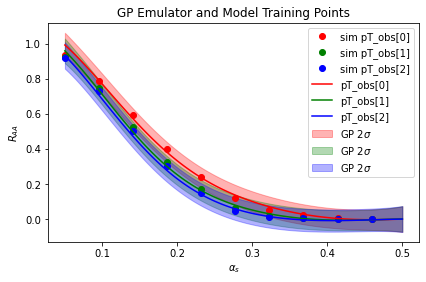

In [21]:
#make a regular grid to plot our Emulator predictions
n_plot_pts = 100
sim_pnt = 10
test_points = np.array([[x,true_values['exponent_inel'],
                 true_values['exponent_el'],true_values['scale_inel'],true_values['scale_el']] for x in np.linspace(prior_ranges['alpha_s'][0],prior_ranges['alpha_s'][1],n_plot_pts)])
simulation_out = simulation(test_points[np.arange(0,n_plot_pts,sim_pnt),:],*pT_range)[:,pT_obs]
plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),0], simulation_out[:,0],'ro', label='sim pT_obs[0]')
plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),0], simulation_out[:,1],'go', label='sim pT_obs[1]')
plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),0], simulation_out[:,2], 'bo', label='sim pT_obs[2]')


#get the GP Emulator's predictions of both the mean and std. deviation
gp_y0, gp_dy0 = emu_predict0(test_points)
gp_y1, gp_dy1 = emu_predict1(test_points)
gp_y2, gp_dy2 = emu_predict2(test_points)


plt.plot(test_points[:,0], gp_y0[:,0], color='red', label='pT_obs[0]')
plt.plot(test_points[:,0], gp_y1[:,0], color='green', label='pT_obs[1]')
plt.plot(test_points[:,0], gp_y2[:,0], color='blue', label='pT_obs[2]')
plt.fill_between(test_points[:,0], y1 = gp_y0[:,0] - 2.*gp_dy0, y2 = gp_y0[:,0] + 2.*gp_dy0, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='red')
plt.fill_between(test_points[:,0], y1 = gp_y1[:,0] - 2.*gp_dy1, y2 = gp_y1[:,0] + 2.*gp_dy1, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='green')
plt.fill_between(test_points[:,0], y1 = gp_y2[:,0] - 2.*gp_dy2, y2 = gp_y2[:,0] + 2.*gp_dy2, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='blue')

plt.xlabel(r'$\alpha_s$')
plt.ylabel(r'$R_{AA}$')
plt.title(r'GP Emulator and Model Training Points')
plt.legend()
plt.tight_layout(True)

plt.show()

Working on 1/10 design


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Working on 2/10 design
Working on 3/10 design
Working on 4/10 design
Working on 5/10 design
Working on 6/10 design
Working on 7/10 design
Working on 8/10 design
Working on 9/10 design
Working on 10/10 design


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning:Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


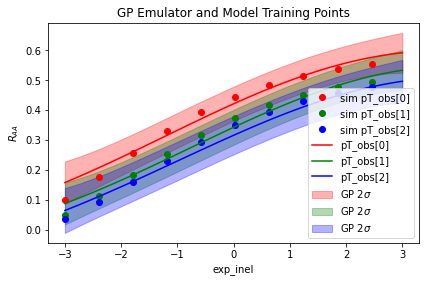

In [22]:
#make a regular grid to plot our Emulator predictions
n_plot_pts = 100
sim_pnt = 10
test_points = np.array([[true_values['alpha_s'],x,
                 true_values['exponent_el'],true_values['scale_inel'],true_values['scale_el']] for x in np.linspace(prior_ranges['exponent_inel'][0],prior_ranges['exponent_inel'][1],n_plot_pts)])

simulation_out = simulation(test_points[np.arange(0,n_plot_pts,sim_pnt),:],*pT_range)[:,pT_obs]
plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),1], simulation_out[:,0],'ro', label='sim pT_obs[0]')
plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),1], simulation_out[:,1],'go', label='sim pT_obs[1]')
plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),1], simulation_out[:,2], 'bo', label='sim pT_obs[2]')


#get the GP Emulator's predictions of both the mean and std. deviation
gp_y0, gp_dy0 = emu_predict0(test_points)
gp_y1, gp_dy1 = emu_predict1(test_points)
gp_y2, gp_dy2 = emu_predict2(test_points)

plt.plot(test_points[:,1], gp_y0[:,0], color='red', label='pT_obs[0]')
plt.plot(test_points[:,1], gp_y1[:,0], color='green', label='pT_obs[1]')
plt.plot(test_points[:,1], gp_y2[:,0], color='blue', label='pT_obs[2]')
plt.fill_between(test_points[:,1], y1 = gp_y0[:,0] - 2.*gp_dy0, y2 = gp_y0[:,0] + 2.*gp_dy0, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='red')
plt.fill_between(test_points[:,1], y1 = gp_y1[:,0] - 2.*gp_dy1, y2 = gp_y1[:,0] + 2.*gp_dy1, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='green')
plt.fill_between(test_points[:,1], y1 = gp_y2[:,0] - 2.*gp_dy2, y2 = gp_y2[:,0] + 2.*gp_dy2, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='blue')

plt.xlabel(r'exp_inel')
plt.ylabel(r'$R_{AA}$')
plt.title(r'GP Emulator and Model Training Points')
plt.legend()
plt.tight_layout(True)

plt.show()

Working on 1/10 design


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Working on 2/10 design
Working on 3/10 design
Working on 4/10 design
Working on 5/10 design
Working on 6/10 design
Working on 7/10 design
Working on 8/10 design
Working on 9/10 design
Working on 10/10 design


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning:Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


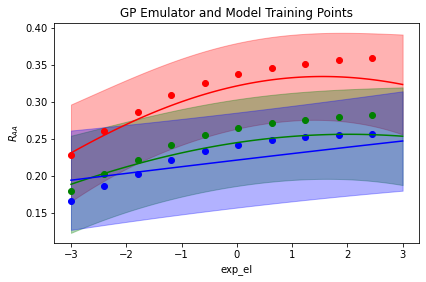

In [23]:
#make a regular grid to plot our Emulator predictions
n_plot_pts = 100
sim_pnt = 10
test_points = np.array([[true_values['alpha_s'],true_values['exponent_inel'],
                 x,true_values['scale_inel'],true_values['scale_el']] for x in np.linspace(prior_ranges['exponent_el'][0],prior_ranges['exponent_el'][1],n_plot_pts)])

simulation_out = simulation(test_points[np.arange(0,n_plot_pts,sim_pnt),:],*pT_range)[:,pT_obs]
plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),2], simulation_out[:,0],'ro', label='sim pT_obs[0]')
plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),2], simulation_out[:,1],'go', label='sim pT_obs[1]')
plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),2], simulation_out[:,2], 'bo', label='sim pT_obs[2]')


#get the GP Emulator's predictions of both the mean and std. deviation
gp_y0, gp_dy0 = emu_predict0(test_points)
gp_y1, gp_dy1 = emu_predict1(test_points)
gp_y2, gp_dy2 = emu_predict2(test_points)

plt.plot(test_points[:,2], gp_y0[:,0], color='red', label='pT_obs[0]')
plt.plot(test_points[:,2], gp_y1[:,0], color='green', label='pT_obs[1]')
plt.plot(test_points[:,2], gp_y2[:,0], color='blue', label='pT_obs[2]')
plt.fill_between(test_points[:,2], y1 = gp_y0[:,0] - 2.*gp_dy0, y2 = gp_y0[:,0] + 2.*gp_dy0, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='red')
plt.fill_between(test_points[:,2], y1 = gp_y1[:,0] - 2.*gp_dy1, y2 = gp_y1[:,0] + 2.*gp_dy1, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='green')
plt.fill_between(test_points[:,2], y1 = gp_y2[:,0] - 2.*gp_dy2, y2 = gp_y2[:,0] + 2.*gp_dy2, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='blue')

plt.xlabel(r'exp_el')
plt.ylabel(r'$R_{AA}$')
plt.title(r'GP Emulator and Model Training Points')
#plt.legend()
plt.tight_layout(True)

plt.show()

 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small


Working on 1/10 design


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Working on 2/10 design
Working on 3/10 design
Working on 4/10 design
Working on 5/10 design
Working on 6/10 design
Working on 7/10 design
Working on 8/10 design
Working on 9/10 design
Working on 10/10 design


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning:Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


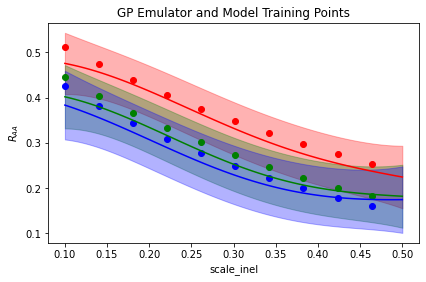

In [24]:
#make a regular grid to plot our Emulator predictions
n_plot_pts = 100
sim_pnt = 10
test_points = np.array([[true_values['alpha_s'],true_values['exponent_inel'],
                 true_values['exponent_el'],x,true_values['scale_el']] for x in np.linspace(prior_ranges['scale_inel'][0],prior_ranges['scale_inel'][1],n_plot_pts)])

simulation_out = simulation(test_points[np.arange(0,n_plot_pts,sim_pnt),:],*pT_range)[:,pT_obs]
plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),3], simulation_out[:,0],'ro', label='sim pT_obs[0]')
plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),3], simulation_out[:,1],'go', label='sim pT_obs[1]')
plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),3], simulation_out[:,2], 'bo', label='sim pT_obs[2]')


#get the GP Emulator's predictions of both the mean and std. deviation
gp_y0, gp_dy0 = emu_predict0(test_points)
gp_y1, gp_dy1 = emu_predict1(test_points)
gp_y2, gp_dy2 = emu_predict2(test_points)

plt.plot(test_points[:,3], gp_y0[:,0], color='red', label='pT_obs[0]')
plt.plot(test_points[:,3], gp_y1[:,0], color='green', label='pT_obs[1]')
plt.plot(test_points[:,3], gp_y2[:,0], color='blue', label='pT_obs[2]')
plt.fill_between(test_points[:,3], y1 = gp_y0[:,0] - 2.*gp_dy0, y2 = gp_y0[:,0] + 2.*gp_dy0, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='red')
plt.fill_between(test_points[:,3], y1 = gp_y1[:,0] - 2.*gp_dy1, y2 = gp_y1[:,0] + 2.*gp_dy1, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='green')
plt.fill_between(test_points[:,3], y1 = gp_y2[:,0] - 2.*gp_dy2, y2 = gp_y2[:,0] + 2.*gp_dy2, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='blue')

plt.xlabel(r'scale_inel')
plt.ylabel(r'$R_{AA}$')
plt.title(r'GP Emulator and Model Training Points')
#plt.legend()
plt.tight_layout(True)

plt.show()

 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: step size becomes too small
 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/scipy/integrate/_ode.py:1180: UserWarning:dopri5: larger nsteps is needed


Working on 1/10 design


 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:78: IntegrationWarning:The integral is probably divergent, or slowly convergent.
 /Users/dananjayaliyanage/git/parton_energy_loss_qcd_bjorken/solver_rk.py:73: IntegrationWarning:The integral is probably divergent, or slowly convergent.


Working on 2/10 design
Working on 3/10 design
Working on 4/10 design
Working on 5/10 design
Working on 6/10 design
Working on 7/10 design
Working on 8/10 design
Working on 9/10 design
Working on 10/10 design


 /Users/dananjayaliyanage/miniconda3/envs/parton_loss/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning:Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.


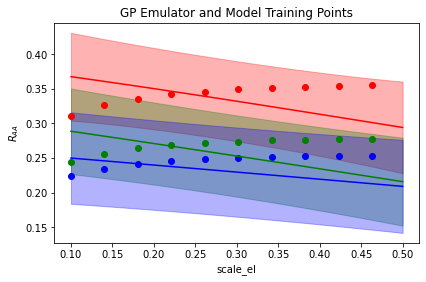

In [25]:
#make a regular grid to plot our Emulator predictions
n_plot_pts = 100
sim_pnt = 10
test_points = np.array([[true_values['alpha_s'],true_values['exponent_inel'],
                 true_values['exponent_el'],true_values['scale_inel'],x] for x in np.linspace(prior_ranges['scale_el'][0],prior_ranges['scale_el'][1],n_plot_pts)])

simulation_out = simulation(test_points[np.arange(0,n_plot_pts,sim_pnt),:],*pT_range)[:,pT_obs]
plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),4], simulation_out[:,0],'ro', label='sim pT_obs[0]')
plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),4], simulation_out[:,1],'go', label='sim pT_obs[1]')
plt.plot(test_points[np.arange(0,n_plot_pts,sim_pnt),4], simulation_out[:,2], 'bo', label='sim pT_obs[2]')


#get the GP Emulator's predictions of both the mean and std. deviation
gp_y0, gp_dy0 = emu_predict0(test_points)
gp_y1, gp_dy1 = emu_predict1(test_points)
gp_y2, gp_dy2 = emu_predict2(test_points)

plt.plot(test_points[:,4], gp_y0[:,0], color='red', label='pT_obs[0]')
plt.plot(test_points[:,4], gp_y1[:,0], color='green', label='pT_obs[1]')
plt.plot(test_points[:,4], gp_y2[:,0], color='blue', label='pT_obs[2]')
plt.fill_between(test_points[:,4], y1 = gp_y0[:,0] - 2.*gp_dy0, y2 = gp_y0[:,0] + 2.*gp_dy0, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='red')
plt.fill_between(test_points[:,4], y1 = gp_y1[:,0] - 2.*gp_dy1, y2 = gp_y1[:,0] + 2.*gp_dy1, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='green')
plt.fill_between(test_points[:,4], y1 = gp_y2[:,0] - 2.*gp_dy2, y2 = gp_y2[:,0] + 2.*gp_dy2, 
                 interpolate=True, alpha=0.3, label=r'GP 2$\sigma$', color='blue')

plt.xlabel(r'scale_el')
plt.ylabel(r'$R_{AA}$')
plt.title(r'GP Emulator and Model Training Points')
#plt.legend()
plt.tight_layout(True)

plt.show()

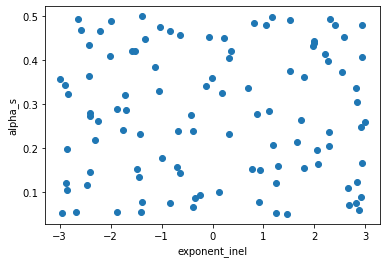

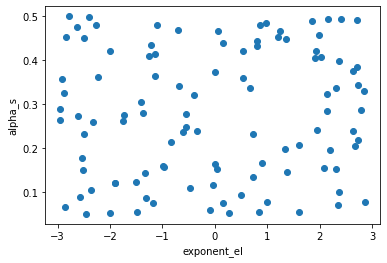

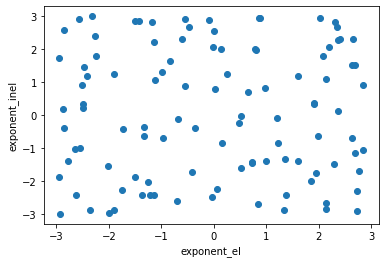

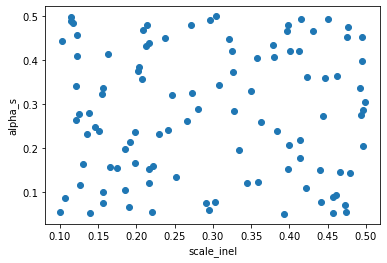

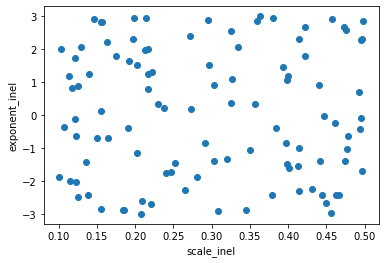

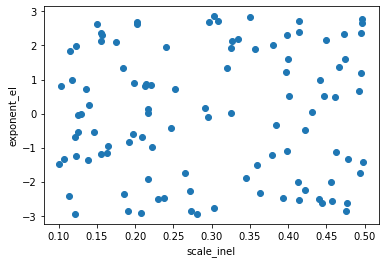

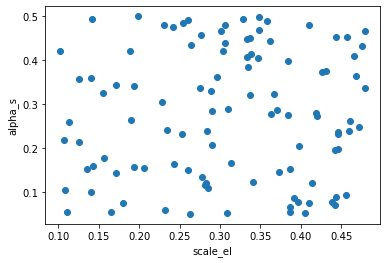

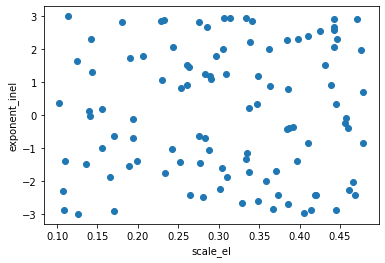

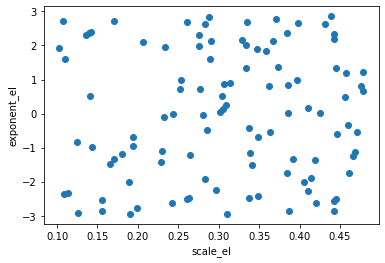

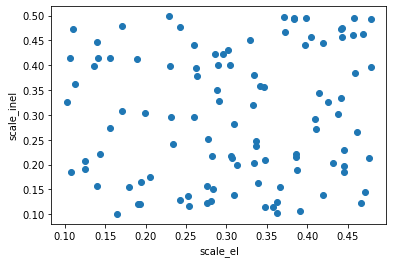

In [45]:
design = gp_array[0].X
for i in range(0,5):
    for k in range(0,i):
        fig, ax = plt.subplots()
        ax.scatter(design[:,i],design[:,k])
        ax.set_xlabel(f'{list(prior_ranges.keys())[i]}')
        ax.set_ylabel(f'{list(prior_ranges.keys())[k]}')

In [26]:
# Define the loglikelihood function
def logLikelihood(theta, x, obs, obserr):
  
    # Model parameters
    theta = np.array(theta)
    
    #alpha_s, mD_factor, exponent_inel, exponent_el = theta
    alpha_s, exp_inel, exp_el, sc_inel, sc_el = theta
    design = np.array([alpha_s, exp_inel, exp_el, sc_inel, sc_el]).reshape(1,-1)
    
    # Model predictions given parameters
    
    model = np.array([emu_predict0(design),emu_predict1(design),emu_predict2(design)],dtype=object)
    modelerr = model[:,1]
    model = model[:,0]
    
    # Likelihood of data given model parameters

    term2 = 0.5*(2*np.pi*np.sqrt(np.sum(obserr**2+modelerr.flatten()**2)))
    return -0.5*np.sum((obs.flatten()-model.flatten())**2/(obserr**2+modelerr.flatten()**2)) - term2

In [27]:
logLikelihood(truth.flatten(),x,obs,obserr)

-1.0042884042986624

In [28]:
# Define the logprior function
def logPrior(theta):
    
    # Model parameters
    theta = np.array(theta)
    alpha_s, exp_inel, exp_el, sc_inel, sc_el = theta 
    
    # Probability of model parameters: flat prior
    if prior_ranges['alpha_s'][0] < alpha_s < prior_ranges['alpha_s'][1] \
        and prior_ranges['exponent_inel'][0] < exp_inel < prior_ranges['exponent_inel'][1] \
        and prior_ranges['exponent_el'][0] < exp_el < prior_ranges['exponent_el'][1]\
        and prior_ranges['scale_inel'][0] < sc_inel < prior_ranges['scale_inel'][1] \
        and prior_ranges['scale_el'][0] < sc_el < prior_ranges['scale_el'][1]:
        return 0.0
    return -np.inf

In [29]:
# Define logprobability function: l(D|theta) * p(theta)
# Note: use this for emcee, not approxposterior!
def logposterior(theta, x, obs, obserr):
        
    lp = logPrior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + logLikelihood(theta, x, obs, obserr)

In [30]:
ntemps = 25
Tmax = 1e3

nwalkers = 50 #guidance is 10*d
ndim = 5
nburnin = 2000
niterations= 5000
nthin = 1#0 # only record every nthin iteration

nthreads = 4

min_theta = np.array([prior_ranges['alpha_s'][0],prior_ranges['exponent_inel'][0],prior_ranges['exponent_el'][0],prior_ranges['scale_inel'][0],prior_ranges['scale_el'][0]])
max_theta = np.array([prior_ranges['alpha_s'][1],prior_ranges['exponent_inel'][1],prior_ranges['exponent_el'][1],prior_ranges['scale_inel'][1],prior_ranges['scale_el'][1]])

# Data and uncertainties that we use to condition our model
args = (x, obs, obserr) # recall x = np.array(pT_obs)

ptsampler=ptemcee.Sampler(nwalkers, ndim, logLikelihood, logPrior, ntemps, 
                  threads=nthreads, Tmax=Tmax, loglargs=args)

# Making the sampling multi-threaded is as simple as adding the threads=Nthreads 
# argument to PTSampler. 

# First, we run the sampler for 1000 burn-in iterations:
pos0 = np.random.uniform(min_theta, max_theta, (ntemps, nwalkers, ndim))

print("Running burn-in phase")
for p, lnprob, lnlike in ptsampler.sample(pos0, iterations=nburnin,adapt=True):
    pass
ptsampler.reset()

print("Running MCMC chains")
#Now we sample for nwalkers*niterations, recording every nthin-th sample:
for p, lnprob, lnlike in ptsampler.sample(p, iterations=niterations, thin=nthin,adapt=True):
    pass 

print('Done MCMC')

mean_acc_frac = np.mean(ptsampler.acceptance_fraction)
print(f"Mean acceptance fraction: {mean_acc_frac:.3f}",
      f"(in total {nwalkers*niterations} steps)")

Running burn-in phase
Running MCMC chains
Done MCMC
Mean acceptance fraction: 0.301 (in total 250000 steps)


In [31]:
chain = ptsampler.chain[0, :, :, :].reshape((-1, ndim))


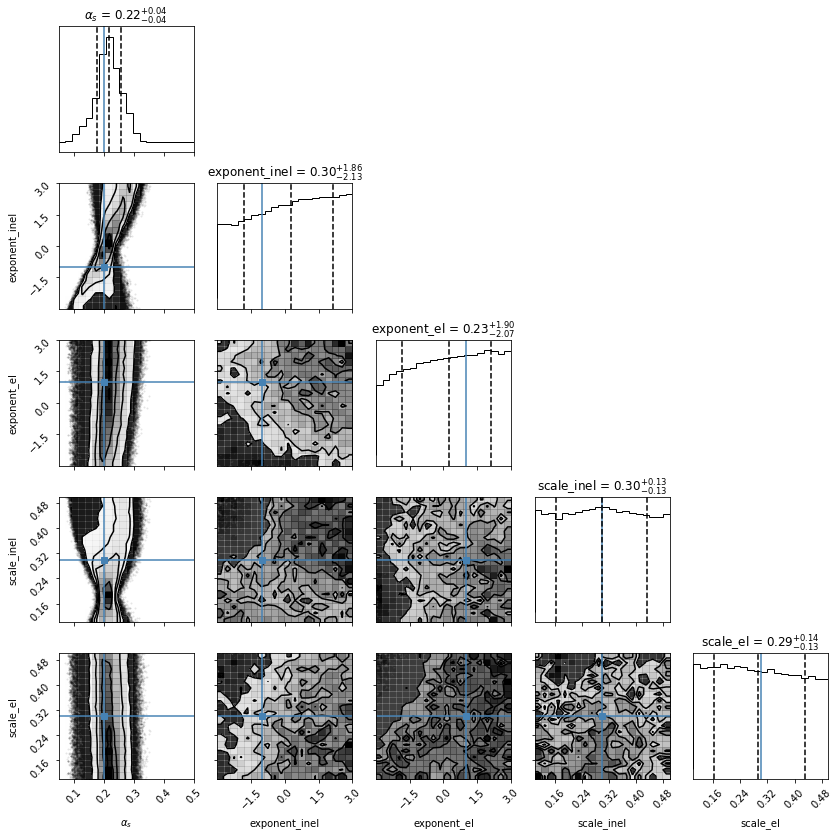

In [32]:
fig = corner.corner(chain, quantiles=[0.16, 0.5, 0.84], truths=truth.T,
                    labels=[r"$\alpha_s$", 'exponent_inel', 'exponent_el','scale_inel','scale_el'], show_titles=True, scale_hist=True,
                    plot_contours=True, range=(prior_ranges.values()));
plt.tight_layout()
plt.savefig('corner-lhsgp-ptemcee.png',dpi=600)
plt.show()